In [1]:
import glob
import numpy as np
import plotly as py
import cufflinks as cf
import pandas as pd
%matplotlib inline

In [2]:
path_to_eval_logs = "../eval/20190327_RetinaNet_train_A_over_ganaug_050_augonlyasbase_eval/valid_day"
plot_title = "Train-A-Over-GANaug-050-augonlyasbase @ Valid-Day"

In [3]:
logs = glob.glob(path_to_eval_logs + "/**/*.txt", recursive = True)

In [4]:
df_iterations = pd.DataFrame()
last_iteration = -1
for log in logs:
    df = pd.read_csv(log)
    df = df.drop(columns = ["Unnamed: 12"])
    df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
    df_iterations = pd.concat([df_iterations, df], axis = 0)
    df_iterations = df_iterations.reset_index(drop = True)
    last_iteration = df["Iteration"]
df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)

In [5]:
df_iterations.head(3)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Iteration
0,0.192506,0.422885,0.157114,0.072658,0.355543,0.375415,0.074713,0.252932,0.288184,0.163562,0.471975,0.532802,2500
1,0.225078,0.490956,0.181930,0.099009,0.397650,0.378298,0.080364,0.276369,0.312842,0.193598,0.494409,0.452104,5000
2,0.244028,0.524067,0.203028,0.112063,0.425612,0.407136,0.085509,0.299599,0.337476,0.214703,0.521550,0.475994,7500


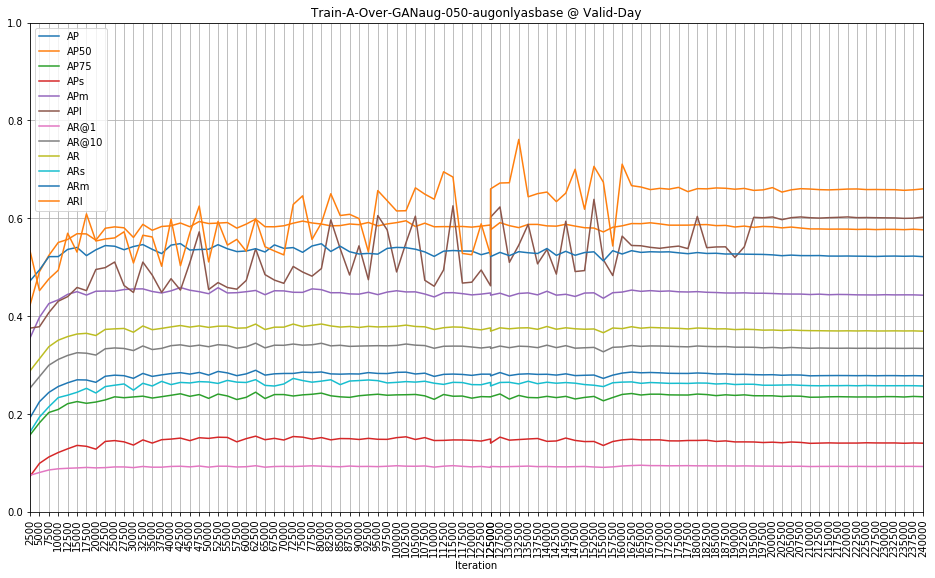

In [6]:
df_iterations.plot(x = 'Iteration', y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], xticks = df_iterations["Iteration"], rot = 90, ylim = (0, 1), title = plot_title, grid = True, figsize = (16, 9))

In [7]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": plot_title,
    "xaxis": {
        "title": "Iteration",
        "tickvals": df_iterations["Iteration"],
    },    
    "yaxis": {
        "title": "Score"
    },
    "width": 960,
    "height": 540
}
fig = df_iterations.iplot(x = 'Iteration', y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)